In [22]:
import pandas as pd
import numpy as np
import re

In [ ]:
#################################################
# 1) FUNCTIONS                                  #
#################################################

In [23]:
from func import *
#unique_clean(data,col,pr=0)
#df_with_text(data,col,text)
#text_in_df(data,col,text)
#two_text_in_df(data,col,text1,text2)
#values_U_not_nan(data,col_name)
#two_text_in_df(data,col,text1,text2='')
#not_nan_get_values(data,col_name,pr=0)
#not_nan_get_index(data, col_name, pr=0)
#nan_get_index(data, col_name, pr=0)
#is_not_decimal(a)
#is_not_13(a)
#split_item_left(st)
#split_item_right(st)

In [ ]:
#################################################
# 2) O_PROD from Open food Facts (EAN13)           #
#################################################

In [24]:
#Import from openFF
df_O_PROD = pd.read_csv('O_OPENFF/output_data/O_data_EAN13.csv', index_col=0)

df_O_PROD['O_EAN13'] = df_O_PROD['O_EAN13'].astype(str)

#Creation of a column with ones to count product matches with groupby method
df_O_PROD['O_COUNT'] = 1

In [25]:
df_O_PROD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 39 columns):
O_EAN13                                                    1100 non-null object
O_categories                                               665 non-null object
O_ingredients                                              976 non-null object
O_nutriments                                               1100 non-null object
O_product_name                                             1090 non-null object
O_manufacturing_places                                     213 non-null object
O_category_properties                                      1096 non-null object
O_ingredients_text                                         646 non-null object
O_product_name_fr                                          1063 non-null object
O_interface_version_modified                               1098 non-null object
O_ingredients_n                                            646 non-null float64
O_pnns_groups_1  

In [26]:
#Adding O_ in front of each column name of df_O_PROD
if not df_O_PROD.columns[0][0:2] == 'O_' :
    for c in df_O_PROD.columns :
        df_O_PROD.rename(columns={c : 'O_' + c}, inplace=True)

In [27]:
df_O_PROD.head()

,O_EAN13,O_categories,O_ingredients,O_nutriments,O_product_name,O_manufacturing_places,O_category_properties,O_ingredients_text,O_product_name_fr,O_interface_version_modified,...,O_carbohydrates_100g,O_sugars_100g,O_fruits_vegetables_nuts_estimate_from_ingredients_100g,O_proteins_100g,O_sodium_100g,O_salt_100g,O_nutrition_score_fr_100g,O_fiber_100g,O_nova_group_100g,O_COUNT
0,3017239003969,"Epicerie, Sauces, Sauces aux légumes, Sauces a...","['Tomate', 'olive noire', ""huile d'olive"", 'câ...","{'energy-kcal_100g': 122, 'carbohydrates_value...",Sauce aux Olives Provençale,France,{},"Tomate (51%), olive noire (36%), huile d'olive...",Sauce aux Olives Provençale,20150316.jqm2,...,3.1,2.7,53.166667,1.3,0.84,2.10,10.0,NaN,3.0,1
1,3017239003976,"Epicerie, Sauces, Sauces aux légumes, Sauces a...","['olive verte égouttée', 'huile de tournesol',...","{'nova-group_100g': 4, 'energy-kj_100g': 1086,...",Sauce aux olives façon pesto vert,NaN,{},"olive verte égouttée (33%), huile de tournesol...",Sauce aux olives façon pesto vert,20120622,...,5.8,2.6,0.000000,1.7,0.30,0.75,8.0,NaN,4.0,1
2,3017239003983,"Epicerie, Sauces, Sauces Pesto, Sauces Pesto R...","['Tomate', 'olive', 'huile de tournesol', 'pom...","{'nutrition-score-fr_serving': 7, 'saturated-f...",Sauce aux olives façon pesto rosso,France,"{'ciqual_food_name:fr': 'Sauce pesto rosso, pr...","Tomate 46%, olive 18% (dont olive verte égoutt...",Sauce aux olives façon pesto rosso,20120622,...,6.3,4.3,46.000000,2.8,0.48,1.20,7.0,NaN,4.0,1
3,3017239003990,NaN,[],"{'saturated-fat': 1, 'sodium_unit': 'g', 'satu...",Sauce aux Olives Citron Confit,NaN,{},NaN,NaN,20150316.jqm2,...,4.2,3.5,NaN,1.4,0.56,1.40,NaN,NaN,NaN,1
4,3017239004003,"Epicerie, Sauces, Sauces tomate, Sauces tomate...","['Tomate', 'champignon', 'olive verte égouttée...","{'carbohydrates': 4.1, 'proteins_100g': 1.5, '...",Sauce aux olives champignons,France,"{'ciqual_food_name:en': 'Tomato sauce, w mushr...","Tomate (36 %), champignon (24 %), olive verte ...",Sauce aux olives champignons,20150316.jqm2,...,4.1,2.5,36.000000,1.5,0.48,1.20,7.0,NaN,4.0,1


In [ ]:
###################################################
# 3) Cration of N_PROD from Nielsen               #
###################################################

In [ ]:
###################################################
# 3.1) N_PROD from Nielsen (select MARKET and KPI) 

In [28]:
#Import from NIELSEN (8 MARKET * 17 KPI * 1425 EAN13)
df_N_ALL = pd.read_csv('N_NIELSEN/output_data/N_ALL_DATA_preprocessed.csv',index_col=0)
df_N_ALL['EAN13']=df_N_ALL['EAN13'].astype(str)
df_N_ALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209040 entries, 0 to 209039
Data columns (total 51 columns):
MARKET_INITIAL         8 non-null object
FACTS                  136 non-null object
NIELSEN_DESCRIPTION    208896 non-null object
EMBALLAGE              208624 non-null object
MARQUE                 206448 non-null object
GAMME                  194752 non-null object
FORMAT                 194752 non-null object
RECETTES               194752 non-null object
COMPTE                 194752 non-null object
STD/PROMO              194752 non-null object
ITEM                   194752 non-null object
CAM AN-1               208896 non-null float64
DERNIER CAM            208896 non-null float64
4 S 28/01/18           208896 non-null float64
4 S 25/02/18           208896 non-null float64
4 S 25/03/18           208896 non-null float64
4 S 22/04/18           208896 non-null float64
4 S 20/05/18           208896 non-null float64
4 S 17/06/18           208896 non-null float64
4 S 15/07/18   

In [29]:
df_N_ALL[['MARKET', 'KPI', 'CATEGORY', 'EMBALLAGE', 'MARQUE', 'SAME_PRODUCT', 'DERNIER CAM']].head(20)

,MARKET,KPI,CATEGORY,EMBALLAGE,MARQUE,SAME_PRODUCT,DERNIER CAM
0,HMSM + PROXI + DRIVE + SDMP,NaN,NaN,NaN,NaN,NaN,NaN
1,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,NaN,NaN,NaN,NaN,NaN
2,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,AUT SCE,NaN,NaN,NaN,586027.1
3,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,AUT SCE,AUT EMB,NaN,NaN,1408.6
4,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,AUT SCE,AUT EMB,AUT MQ,NaN,1408.6
5,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,AUT SCE,AUT EMB,AUT MQ,"AUT MQ, SCE CLAS, CITRON VERT PIMENT DOUX, AUT...",2.7
6,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,AUT SCE,AUT EMB,AUT MQ,"AUT MQ, SCE CLAS, CURRY JAUNE THAI, AUT EMB,",803.5
7,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,AUT SCE,AUT EMB,AUT MQ,"AUT MQ, SCE CLAS, CURRY VERT & LEGUMES, AUT EMB,",602.5
8,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,AUT SCE,AUT EMB,AUT MQ,"AUT MQ, SCE CLAS, YUZU, AUT EMB,",0.0
9,HMSM + PROXI + DRIVE + SDMP,Ventes Volume,AUT SCE,BRIC,NaN,NaN,30922.6


In [ ]:
df_N_ALL

In [30]:
# list of all the markets
MARKET_U = pd.DataFrame(unique_clean(df_N_ALL,'MARKET',pr=0), columns =['MARKET'])
market_short = ['France','Hyper-Supermarkets','Supermarkets','Supermarkets small','Supermarkets big','Paris Region','MONOPRIX shops','FRANPRIX shops']
MARKET_U['MARKET_SHORT']=market_short
comments=['including hard discounter and cash & carry','Hyper > 4.000 m2 (to be confirmed)','','', '','','city center large shops','city center medium shops']
MARKET_U['MARKET_COMMENTS'] = comments
MARKET_U


number of  MARKET  unique (non null) values:  8
<class 'list'> 



,MARKET,MARKET_SHORT,MARKET_COMMENTS
0,HMSM + PROXI + DRIVE + SDMP,France,including hard discounter and cash & carry
1,ENSEIGNES HMSM,Hyper-Supermarkets,Hyper > 4.000 m2 (to be confirmed)
2,ENSEIGNES SM,Supermarkets,
3,SM / MAGS < 2000 M2,Supermarkets small,
4,SM / MAGS > 2000 M2,Supermarkets big,
5,REGION 1 IDF (HMSM),Paris Region,
6,MONOPRIX,MONOPRIX shops,city center large shops
7,FRANPRIX,FRANPRIX shops,city center medium shops


In [31]:
#list of 17 KPI
KPI_U = pd.DataFrame(unique_clean(df_N_ALL,'KPI',pr=0), columns =['KPI'])
KPI_U


number of  KPI  unique (non null) values:  17
<class 'list'> 



,KPI
0,Ventes Volume
1,Ventes Valeur
2,Prix Moyen
3,Prix Moyen UC
4,DN
5,DV
6,VMH Pondérées
7,VMH UC Pond.
8,CA Moyen Hebdo Pond.
9,Poids des Ventes Volume Promo


In [32]:
#Select Market and KPI
#creation of df_N_prod (1 MARKET * 1 KPI * 1425 PRODUCTS)
MARKET = 'HMSM + PROXI + DRIVE + SDMP' # France
KPI = 'Ventes Volume'
MKT_SEGMENT_AND_KPI = (df_N_ALL['KPI'] == KPI) & (df_N_ALL['MARKET'] == MARKET)
df_N_PROD = df_N_ALL[MKT_SEGMENT_AND_KPI]

In [33]:
#Adding N_ in front of each column name 
if not df_N_PROD.columns[0][0:2] == 'N_' :
    for c in df_N_PROD.columns :
        df_N_PROD.rename(columns={c : 'N_' + c}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [34]:
df_N_PROD.columns

Index(['N_MARKET_INITIAL', 'N_FACTS', 'N_NIELSEN_DESCRIPTION', 'N_EMBALLAGE',
       'N_MARQUE', 'N_GAMME', 'N_FORMAT', 'N_RECETTES', 'N_COMPTE',
       'N_STD/PROMO', 'N_ITEM', 'N_CAM AN-1', 'N_DERNIER CAM',
       'N_4 S 28/01/18', 'N_4 S 25/02/18', 'N_4 S 25/03/18', 'N_4 S 22/04/18',
       'N_4 S 20/05/18', 'N_4 S 17/06/18', 'N_4 S 15/07/18', 'N_4 S 12/08/18',
       'N_4 S 09/09/18', 'N_4 S 07/10/18', 'N_4 S 04/11/18', 'N_4 S 02/12/18',
       'N_4 S 30/12/18', 'N_4 S 27/01/19', 'N_4 S 24/02/19', 'N_4 S 24/03/19',
       'N_4 S 21/04/19', 'N_4 S 19/05/19', 'N_4 S 16/06/19', 'N_4 S 14/07/19',
       'N_4 S 11/08/19', 'N_4 S 08/09/19', 'N_4 S 06/10/19', 'N_4 S 03/11/19',
       'N_4 S 01/12/19', 'N_4 S 29/12/19', 'N_EAN13', 'N_MARKET', 'N_KPI',
       'N_CATEGORY', 'N_ORGANIC', 'N_WEIGHT', 'N_INITIAL_INDEX', 'N_EAN_promo',
       'N_EAN13_num', 'N_SAME_PRODUCT', 'N_LONG_BRAND', 'N_WEIGHT_num'],
      dtype='object')

In [36]:
df_N_PROD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537 entries, 1 to 1537
Data columns (total 18 columns):
N_EAN13                  1537 non-null object
N_MARQUE                 1518 non-null object
N_SAME_PRODUCT           1432 non-null object
N_GAMME                  1432 non-null object
N_RECETTES               1432 non-null object
N_ORGANIC                1536 non-null object
N_FORMAT                 1432 non-null object
N_WEIGHT_num             1537 non-null int64
N_EMBALLAGE              1534 non-null object
N_COMPTE                 1432 non-null object
N_STD/PROMO              1432 non-null object
N_DERNIER CAM            1536 non-null float64
N_CAM AN-1               1536 non-null float64
N_ITEM                   1432 non-null object
N_NIELSEN_DESCRIPTION    1536 non-null object
N_INITIAL_INDEX          1537 non-null int64
N_CATEGORY               1536 non-null object
N_COUNT                  1537 non-null int64
dtypes: float64(2), int64(3), object(13)
memory usage: 228.1+ KB


In [37]:
df_N_PROD.shape

(1537, 18)

In [ ]:
##############################################@
# 3.2) Remove separation lines from df_PROD

In [98]:
df_N_PROD[['N_EAN13', 'N_EMBALLAGE', 'N_MARQUE', 'N_SAME_PRODUCT', 'N_DERNIER CAM']].head(10)

,N_EAN13,N_EMBALLAGE,N_MARQUE,N_SAME_PRODUCT,N_DERNIER CAM
1,0,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,586027.1
3,0,AUT EMB,NaN,NaN,1408.6
4,0,AUT EMB,AUT MQ,NaN,1408.6
5,3760052155536,AUT EMB,AUT MQ,"AUT MQ, SCE CLAS, CITRON VERT PIMENT DOUX, AUT...",2.7
6,8854404005213,AUT EMB,AUT MQ,"AUT MQ, SCE CLAS, CURRY JAUNE THAI, AUT EMB,",803.5
7,8858135071028,AUT EMB,AUT MQ,"AUT MQ, SCE CLAS, CURRY VERT & LEGUMES, AUT EMB,",602.5
8,3760052155512,AUT EMB,AUT MQ,"AUT MQ, SCE CLAS, YUZU, AUT EMB,",0.0
9,0,BRIC,NaN,NaN,30922.6
10,0,BRIC,MDD,NaN,30922.6


In [94]:
row_to_remove = (df_N_PROD['N_EAN13'] == '0') & (df_N_PROD['N_MARQUE'] != 'MDD') & (df_N_PROD['N_MARQUE'] != 'MDD PREMIER PRIX')

In [99]:
row_to_remove.head(10)

1      True
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9      True
10    False
dtype: bool

In [102]:
row_to_keep = ~row_to_remove
df_N_PROD = df_N_PROD[row_to_keep]
df_N_PROD.shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(1441, 18)

In [ ]:
#################################################
# 3.3) N_PROD EXPLORATION                         

In [103]:
#list of all the brands
BRANDS_U = pd.DataFrame(sorted(unique_clean(df_N_PROD,'N_MARQUE',pr=0)), columns =['BRANDS'])
BRANDS_U


number of  N_MARQUE  unique (non null) values:  30
<class 'list'> 



,BRANDS
0,AUT MQ
1,BARILLA
2,BJORG
3,BUITONI
4,CASERTA
5,CIRIO
6,DE CECCO
7,FLORELLI
8,HEINZ
9,ITALIANS DO IT BETTER


In [104]:
#Select columns
new_cols = ['N_EAN13', 'N_MARQUE','N_SAME_PRODUCT', 'N_GAMME','N_RECETTES', 'N_ORGANIC', 'N_FORMAT','N_WEIGHT_num', 'N_EMBALLAGE', 
     'N_COMPTE', 'N_STD/PROMO', 'N_DERNIER CAM', 'N_CAM AN-1', 'N_ITEM',
    'N_NIELSEN_DESCRIPTION', 'N_INITIAL_INDEX', 'N_CATEGORY']

df_N_PROD = df_N_PROD.loc[:, new_cols]
df_N_PROD['N_COUNT'] = 1

In [ ]:
#AUT MQ = other brands (cf. OpenFF) / with EAN13 
#MDD = retailer brands (generally similar products to top sales in category) / no EAN13 detail
#MDD 1 PRX = retailer brands (lowest price in category, generally lower quality products) / no EAN13 detail
#MQ FAB 1 PRX = independant brands (lowest price in category) / with EAN13 details

In [105]:
temp = df_N_PROD[[ 'N_MARQUE', 'N_EAN13', 'N_EMBALLAGE', 'N_SAME_PRODUCT', 'N_DERNIER CAM', 'N_CATEGORY']]
temp[temp['N_MARQUE'] == 'MDD']

,N_MARQUE,N_EAN13,N_EMBALLAGE,N_SAME_PRODUCT,N_DERNIER CAM,N_CATEGORY
10,MDD,0,BRIC,NaN,30922.6,AUT SCE
40,MDD,0,DOY PAC,NaN,10404.9,AUT SCE
160,MDD,0,POT,NaN,223671.1,AUT SCE
194,MDD,0,BRIC,NaN,172796.2,SAUCES POUR FECULENTS
231,MDD,0,BTE FER,NaN,1716115.1,SAUCES POUR FECULENTS
298,MDD,0,DOY PAC,NaN,68275.0,SAUCES POUR FECULENTS
314,MDD,0,FLA PLAS,NaN,50949.1,SAUCES POUR FECULENTS
1142,MDD,0,POT,NaN,30787099.7,SAUCES POUR FECULENTS
1516,MDD,0,TUB,NaN,858828.7,SAUCES POUR FECULENTS


In [106]:
temp_by_brand = temp.groupby(by='N_MARQUE').sum().sort_values(by='N_DERNIER CAM', ascending=False)
temp_by_brand

,N_DERNIER CAM
N_MARQUE,
MDD,33919062.4
PANZANI,28699809.7
BARILLA,9563414.9
ZAPETTI BUITONI,3751200.1
HEINZ,3039459.2
SACLA,1585406.4
AUT MQ,960493.9
JARDIN BIO,903909.8
MQ FAB 1 PRX,547005.1


In [107]:
round(temp_by_brand['N_DERNIER CAM'].sum(), 0)

83943112.0

In [ ]:
#analysing product

In [108]:
len(df_N_PROD['N_SAME_PRODUCT'].unique())

771

In [109]:
df_prod_summary = df_N_PROD[['N_SAME_PRODUCT', 'N_COUNT', 'N_DERNIER CAM', 'N_CAM AN-1']].groupby(['N_SAME_PRODUCT']).sum()

In [110]:
df_prod_summary.shape

(770, 3)

In [111]:
df_prod_summary.describe()

,N_COUNT,N_DERNIER CAM,N_CAM AN-1
count,770.000000,7.700000e+02,7.700000e+02
mean,1.859740,6.496630e+04,6.617940e+04
std,3.400614,3.534545e+05,4.281951e+05
min,1.000000,0.000000e+00,0.000000e+00
25%,1.000000,2.187500e+01,1.850000e+01
50%,1.000000,7.729500e+02,7.727500e+02
75%,1.000000,7.762175e+03,7.033825e+03
max,47.000000,4.905420e+06,8.800759e+06


In [112]:
df_prod_summary.tail(20)

,N_COUNT,N_DERNIER CAM,N_CAM AN-1
N_SAME_PRODUCT,,,
"ZAPETTI BUITONI, LEGUMES, CURRY A LA CORIANDRE, POT,",1,0.0,3.1
"ZAPETTI BUITONI, LEGUMES, FROMAGE, POT,",2,6.7,522.8
"ZAPETTI BUITONI, LEGUMES, GRECQUE COMPOTEE D'AUBERGINES, POT,",1,1.2,181.2
"ZAPETTI BUITONI, LEGUMES, H OLIVE, BTE FER,",3,803789.5,795268.4
"ZAPETTI BUITONI, LEGUMES, HERB PROV, POT,",1,0.0,0.0
"ZAPETTI BUITONI, LEGUMES, NAPOLITAIN, POT,",7,3868.1,29428.5
"ZAPETTI BUITONI, LEGUMES, NATURE, POT,",2,0.0,0.0
"ZAPETTI BUITONI, LEGUMES, NATURE, TUB,",1,0.0,0.2
"ZAPETTI BUITONI, LEGUMES, OLIVES CHAMPIGNONS A L'ORIGAN, POT,",1,0.8,2.6


[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'number of formats')]

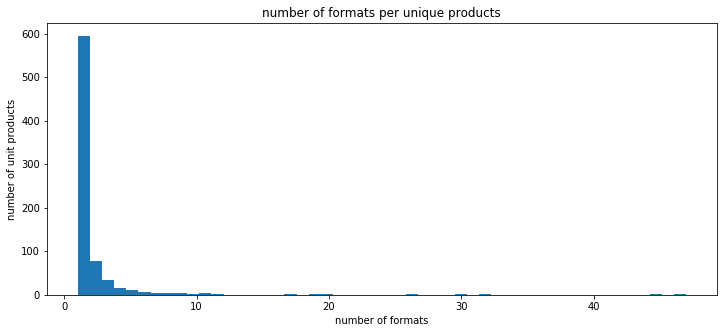

In [113]:
df_prod_summary['N_COUNT'].plot.hist(bins=50, title='number of formats per unique products', figsize=(12,5)).set(xlabel='number of formats', ylabel='number of unit products')

[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'number of formats')]

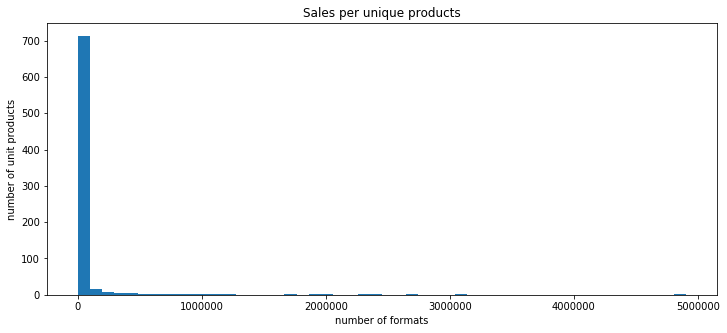

In [114]:
df_prod_summary['N_DERNIER CAM'].plot.hist(bins=50, title='Sales per unique products', figsize=(12,5)).set(xlabel='number of formats', ylabel='number of unit products')

[Text(0, 0.5, 'number of unit products'),
 Text(0.5, 0, 'number of formats (EAN13)')]

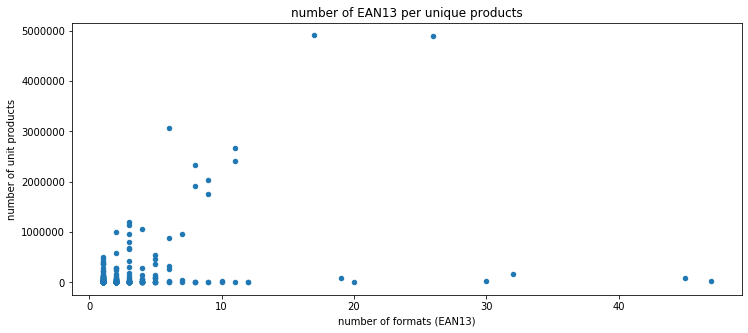

In [115]:
df_prod_summary.plot.scatter(x='N_COUNT', y='N_DERNIER CAM', title='number of EAN13 per unique products', figsize=(12,5)).set(xlabel='number of formats (EAN13)', ylabel='number of unit products')

In [116]:
df_prod_summary[df_prod_summary['N_COUNT'] > 10]

,N_COUNT,N_DERNIER CAM,N_CAM AN-1
N_SAME_PRODUCT,,,
"AUT MQ, BIO, BASILIC, POT,",12,10217.7,3288.5
"AUT MQ, BOLO CLASSIQUE, BOLOGNAISE, POT,",32,168415.0,99866.9
"AUT MQ, LEGUMES, ARRABIATA, POT,",30,31511.6,30837.3
"AUT MQ, LEGUMES, BASILIC, POT,",45,87811.2,84480.8
"AUT MQ, LEGUMES, NAPOLITAIN, POT,",12,6762.0,6920.5
"AUT MQ, LEGUMES, NATURE, POT,",19,95229.0,95189.4
"AUT MQ, LEGUMES, OLIVE, POT,",11,14668.4,13612.7
"AUT MQ, PESTO, PESTO RGE, POT,",20,10183.1,13165.5
"AUT MQ, PESTO, PESTO VERD, POT,",47,21023.8,24861.9


**Estimation des EAN Manquants**

In [ ]:
#################################################
# 4) MERGING N_PROD AND O_PROD INTO M_PROD      #
#################################################

In [ ]:
# 4.1) Merge of the two databases

In [117]:
df_M_PROD = df_N_PROD.merge(df_O_PROD, left_on='N_EAN13', right_on='O_EAN13', how='left')
df_M_PROD.shape

(1441, 57)

In [118]:
df_M_PROD

,N_EAN13,N_MARQUE,N_SAME_PRODUCT,N_GAMME,N_RECETTES,N_ORGANIC,N_FORMAT,N_WEIGHT_num,N_EMBALLAGE,N_COMPTE,...,O_carbohydrates_100g,O_sugars_100g,O_fruits_vegetables_nuts_estimate_from_ingredients_100g,O_proteins_100g,O_sodium_100g,O_salt_100g,O_nutrition_score_fr_100g,O_fiber_100g,O_nova_group_100g,O_COUNT
0,3760052155536,AUT MQ,"AUT MQ, SCE CLAS, CITRON VERT PIMENT DOUX, AUT...",SCE CLAS,CITRON VERT PIMENT DOUX,NON BIO,PF,100,AUT EMB,1CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8854404005213,AUT MQ,"AUT MQ, SCE CLAS, CURRY JAUNE THAI, AUT EMB,",SCE CLAS,CURRY JAUNE THAI,NON BIO,PF,300,AUT EMB,1CT,...,7.8,3.0,6.50,2.4,0.44000,1.1000,NaN,NaN,4.0,1.0
2,8858135071028,AUT MQ,"AUT MQ, SCE CLAS, CURRY VERT & LEGUMES, AUT EMB,",SCE CLAS,CURRY VERT & LEGUMES,NON BIO,PF,300,AUT EMB,1CT,...,6.4,3.7,73.00,1.5,0.60000,1.5000,6.0,1.6,3.0,1.0
3,3760052155512,AUT MQ,"AUT MQ, SCE CLAS, YUZU, AUT EMB,",SCE CLAS,YUZU,NON BIO,PF,100,AUT EMB,1CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,MDD,NaN,NaN,NaN,* not found,NaN,0,BRIC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,3038359002823,PANZANI,"PANZANI, LEGUMES, PT LEGUME, TUB,",LEGUMES,PT LEGUME,NON BIO,PF,180,TUB,3CT,...,15.0,8.1,NaN,2.7,1.12000,2.8000,NaN,NaN,NaN,1.0
1437,3038359008498,PANZANI,"PANZANI, LEGUMES, TOM CUI A L'ORIGAN, TUB,",LEGUMES,TOM CUI A L'ORIGAN,NON BIO,PF,180,TUB,1CT,...,14.5,10.0,49.00,2.9,1.16000,2.9000,11.0,1.7,4.0,1.0
1438,3038359005657,PANZANI,"PANZANI, PESTO, PESTO VERD, TUB,",PESTO,PESTO VERD,NON BIO,PF,160,TUB,1CT,...,9.5,6.1,0.00,4.4,1.28000,3.2000,13.0,2.5,4.0,1.0
1439,3038359001413,ZAKIA,"ZAKIA, LEGUMES, TOMATE PIMENTE, TUB,",LEGUMES,TOMATE PIMENTE,NON BIO,PF,180,TUB,1CT,...,15.0,8.1,50.05,2.7,1.12000,2.8000,NaN,2.7,4.0,1.0


In [ ]:
#Analysis of missing EAN13 in O_PROD

In [119]:
df_M_PROD_SUM = df_M_PROD[['N_SAME_PRODUCT', 'N_COUNT', 'O_COUNT', 'N_DERNIER CAM', 'N_CAM AN-1']].groupby(['N_SAME_PRODUCT']).sum().sort_values(by='N_DERNIER CAM', ascending=False)
df_M_PROD_SUM['MISSING_COUNT'] = df_M_PROD_SUM['N_COUNT'].astype(int) - df_M_PROD_SUM['O_COUNT'].astype(int)

In [120]:
df_M_PROD_SUM[df_M_PROD_SUM['MISSING_COUNT'] != 0].

SyntaxError: invalid syntax (<ipython-input-120-9d7b3c63e44b>, line 1)

In [121]:
df_M_PROD_SUM.head(50)

,N_COUNT,O_COUNT,N_DERNIER CAM,N_CAM AN-1,MISSING_COUNT
N_SAME_PRODUCT,,,,,
"PANZANI, LEGUMES, PROVENCALE, POT,",17,10.0,4905419.6,4747571.5,7
"PANZANI, BOLO CLASSIQUE, BOLOGNAISE, POT,",26,19.0,4899534.7,8800759.4,7
"PANZANI, LEGUMES, PT LEGUME, TUB,",6,6.0,3071093.9,3081322.4,0
"PANZANI, LEGUMES, TOMATE CUI, POT,",11,10.0,2670954.1,2632010.4,1
"ZAPETTI BUITONI, BOLO CLASSIQUE, ITALIEN, BTE FER,",11,7.0,2418763.9,2392954.5,4
"HEINZ, LEGUMES, AIL OIGNON, BRIC,",8,3.0,2325710.4,2085754.5,5
"PANZANI, LEGUMES, TOMATES BASILIC, POT,",9,4.0,2026021.2,1796281.9,5
"PANZANI, BOLO CLASSIQUE, BOLOGNAISE PUR BOEUF, POT,",8,6.0,1923095.6,79428.1,2
"BARILLA, LEGUMES, BASILIC, POT,",9,7.0,1746062.2,1792045.8,2


In [122]:
temp = df_M_PROD_SUM[df_M_PROD_SUM['N_DERNIER CAM'] > 500000]
print(temp['N_DERNIER CAM'].sum())
temp

36976704.10000001


,N_COUNT,O_COUNT,N_DERNIER CAM,N_CAM AN-1,MISSING_COUNT
N_SAME_PRODUCT,,,,,
"PANZANI, LEGUMES, PROVENCALE, POT,",17,10.0,4905419.6,4747571.5,7
"PANZANI, BOLO CLASSIQUE, BOLOGNAISE, POT,",26,19.0,4899534.7,8800759.4,7
"PANZANI, LEGUMES, PT LEGUME, TUB,",6,6.0,3071093.9,3081322.4,0
"PANZANI, LEGUMES, TOMATE CUI, POT,",11,10.0,2670954.1,2632010.4,1
"ZAPETTI BUITONI, BOLO CLASSIQUE, ITALIEN, BTE FER,",11,7.0,2418763.9,2392954.5,4
"HEINZ, LEGUMES, AIL OIGNON, BRIC,",8,3.0,2325710.4,2085754.5,5
"PANZANI, LEGUMES, TOMATES BASILIC, POT,",9,4.0,2026021.2,1796281.9,5
"PANZANI, BOLO CLASSIQUE, BOLOGNAISE PUR BOEUF, POT,",8,6.0,1923095.6,79428.1,2
"BARILLA, LEGUMES, BASILIC, POT,",9,7.0,1746062.2,1792045.8,2


In [123]:
temp = df_M_PROD_SUM[df_M_PROD_SUM['N_DERNIER CAM'] > 100000]
print(temp['N_DERNIER CAM'].sum())
print(temp['N_DERNIER CAM'].count())

print(df_M_PROD['N_DERNIER CAM'].sum())
print(df_M_PROD['N_DERNIER CAM'].count())

print(temp['N_DERNIER CAM'].sum() - df_M_PROD['N_DERNIER CAM'].sum())
print(temp['N_DERNIER CAM'].count() - df_M_PROD['N_DERNIER CAM'].count())

temp

45301700.7
57
83943111.60000001
1441
-38641410.900000006
-1384


,N_COUNT,O_COUNT,N_DERNIER CAM,N_CAM AN-1,MISSING_COUNT
N_SAME_PRODUCT,,,,,
"PANZANI, LEGUMES, PROVENCALE, POT,",17,10.0,4905419.6,4747571.5,7
"PANZANI, BOLO CLASSIQUE, BOLOGNAISE, POT,",26,19.0,4899534.7,8800759.4,7
"PANZANI, LEGUMES, PT LEGUME, TUB,",6,6.0,3071093.9,3081322.4,0
"PANZANI, LEGUMES, TOMATE CUI, POT,",11,10.0,2670954.1,2632010.4,1
"ZAPETTI BUITONI, BOLO CLASSIQUE, ITALIEN, BTE FER,",11,7.0,2418763.9,2392954.5,4
"HEINZ, LEGUMES, AIL OIGNON, BRIC,",8,3.0,2325710.4,2085754.5,5
"PANZANI, LEGUMES, TOMATES BASILIC, POT,",9,4.0,2026021.2,1796281.9,5
"PANZANI, BOLO CLASSIQUE, BOLOGNAISE PUR BOEUF, POT,",8,6.0,1923095.6,79428.1,2
"BARILLA, LEGUMES, BASILIC, POT,",9,7.0,1746062.2,1792045.8,2


[Text(0, 0.5, 'number of unique products'), Text(0.5, 0, 'sales')]

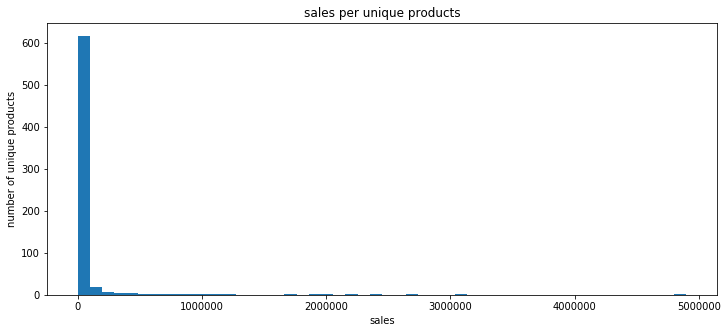

In [59]:
df_M_PROD_SUM['N_DERNIER CAM'].plot.hist(bins=50, title='sales per unique products', figsize=(12,5)).set(xlabel='sales', ylabel='number of unique products')

In [60]:
temp.to_excel('sales_100000.xls')

In [126]:
df_prod_no_match = df_M_PROD_SUM[df_M_PROD_SUM['O_COUNT'] == 0]
df_prod_no_match

,N_COUNT,O_COUNT,N_DERNIER CAM,N_CAM AN-1,MISSING_COUNT
N_SAME_PRODUCT,,,,,
"KNORR, LEGUMES, LEGUME, BTE FER,",1,0.0,4775.0,5110.0,1
"MQ FAB 1 PRX, BOLO CLASSIQUE, BOLOG VDE, POT,",1,0.0,3271.4,3284.4,1
"ITALIANS DO IT BETTER, AUTRE GAMME, RAGU DE VIANDE, POT,",1,0.0,1543.7,0.0,1
"AUT MQ, SCE CLAS, CURRY INDIENNE TIKKA MASALA, POT,",1,0.0,1092.1,0.0,1
"AUT MQ, LEGUMES, AIL, POT,",1,0.0,877.2,692.4,1
...,...,...,...,...,...
"AUT MQ, SCE CLAS, KASHMIRI MILD KORMA, POT,",1,0.0,0.0,0.0,1
"AUT MQ, SCE CLAS, JAUNTY JALFREZI PASTE, POT,",1,0.0,0.0,0.3,1
"AUT MQ, SCE CLAS, CREMEE AU FOIE GRAS, DOY PAC,",1,0.0,0.0,0.3,1


In [127]:
df_prod_no_match[['N_DERNIER CAM', 'N_COUNT']].sum()

N_DERNIER CAM    14780.1
N_COUNT            101.0
dtype: float64